In [1]:
%pylab inline
import prettysounds
import os
repo_dir = '/Users/Torben/Code/prettysounds/'

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
image_file = os.path.join(repo_dir,'dickbutt.jpg')


reshaping image to 50x125
writing midi file


/Users/Torben/anaconda2/lib/python2.7/site-packages/midiutil/MidiFile.py:899: FutureWarning: Please explicitly set adjust_origin. Default behaviour will change in a future version.
  FutureWarning)


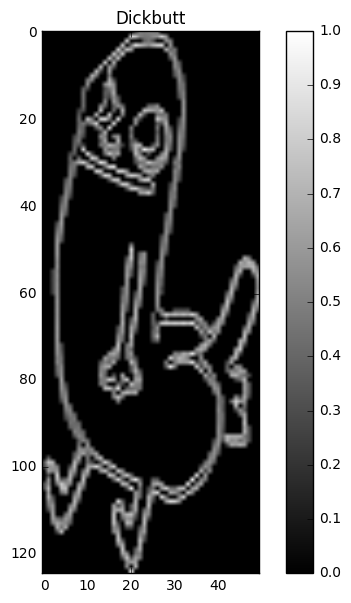

In [3]:
scale_template=np.asarray([0,2,4,5,7,9,11])
reshape_params=[50,125]
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params)

# Vanilla image to midi. 
fig = prettysounds.plot_grayscale_img(image_mat,title='Dickbutt')
output_file = os.path.join(repo_dir,'dickbutt.mid')
prettysounds.matrix_to_midi(image_mat, first_note=0, tempo=250, output_file=output_file);




writing midi file


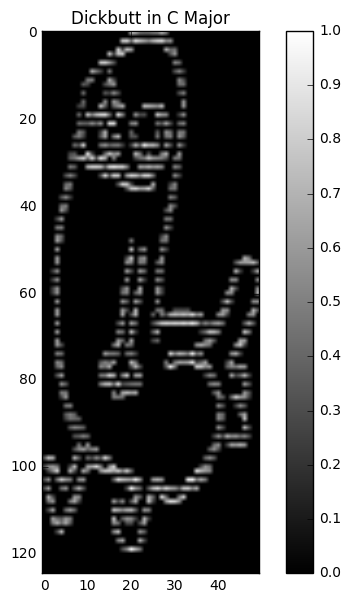

In [4]:
# putting image in C Major
scale_template = np.asarray([0,2,4,5,7,9,11])
music_mat = prettysounds.add_music(image_mat,scale_template=scale_template,method='round')
fig = prettysounds.plot_grayscale_img(music_mat,title='Dickbutt in C Major');
output_file2 = os.path.join(repo_dir,'dickbutt_C_Maj.mid');
prettysounds.matrix_to_midi(music_mat, first_note=0, tempo=250, output_file=output_file2);


writing midi file


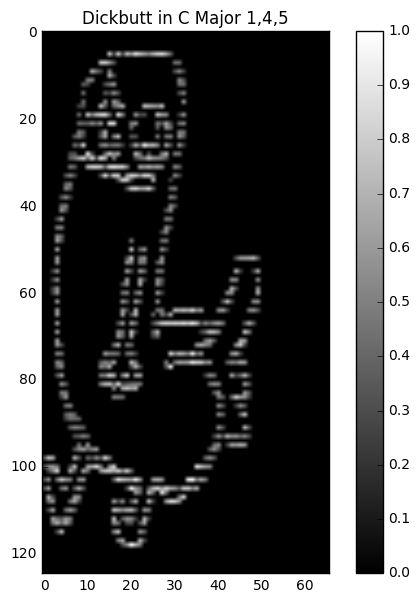

In [5]:
chord_array = [0,5,7,7];
scale_templates = [scale_template for i in chord_array]
chord_change_mat = prettysounds.apply_chord_changes(image_mat,chord_array)
fig = prettysounds.plot_grayscale_img(chord_change_mat,title='Dickbutt in C Major 1,4,5');
output_file3 = os.path.join(repo_dir,'dickbutt_C_Maj_145chords.mid')
prettysounds.matrix_to_midi(chord_change_mat, first_note=0, tempo=250, output_file=output_file3);

In [ ]:
# work in progress
# my_midi_file = '/Users/Torben/Code/prettysounds/bach_demo.mid'
# my_wav_file = '/Users/Torben/Code/prettysounds/jack.wav'
# fs = FluidSynth()
# fs.midi_to_audio(my_midi_file,my_wav_file)